In [ ]:
import numpy as np
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Set path to dataset
dataset_path = r"C:\\Users\\shekh\\Downloads\\archive\\leapGestRecog"  # Update to your actual path

def load_data(data_dir):
    images = []
    labels = []
    for subject in os.listdir(data_dir):
        subject_path = os.path.join(data_dir, subject)
        if os.path.isdir(subject_path):
            for gesture in os.listdir(subject_path):
                gesture_path = os.path.join(subject_path, gesture)
                if os.path.isdir(gesture_path):
                    for img_file in os.listdir(gesture_path):
                        if img_file.endswith('.png'):
                            img_path = os.path.join(gesture_path, img_file)
                            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                            img = cv2.resize(img, (64, 64))  # Resize for faster training
                            images.append(img.flatten())
                            labels.append(gesture)
    return np.array(images), np.array(labels)

X, y = load_data(dataset_path)
print(f'Dataset shape: {X.shape}, Labels shape: {y.shape}')

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [5]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       400
         02_l       1.00      1.00      1.00       400
      03_fist       1.00      1.00      1.00       400
04_fist_moved       1.00      1.00      1.00       400
     05_thumb       1.00      1.00      1.00       400
     06_index       1.00      1.00      1.00       400
        07_ok       1.00      1.00      1.00       400
08_palm_moved       1.00      1.00      1.00       400
         09_c       1.00      1.00      1.00       400
      10_down       1.00      1.00      1.00       400

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



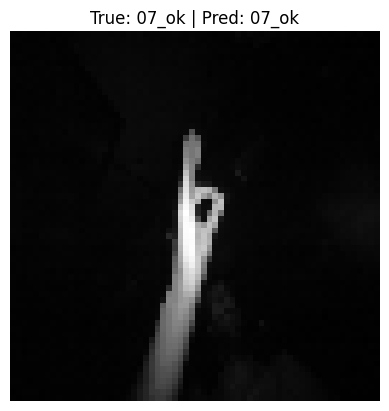

In [6]:
def show_prediction(index):
    img = X_test[index].reshape(64, 64)
    true_label = le.inverse_transform([y_test[index]])[0]
    pred_label = le.inverse_transform([y_pred[index]])[0]

    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label} | Pred: {pred_label}')
    plt.axis('off')
    plt.show()

show_prediction(0)

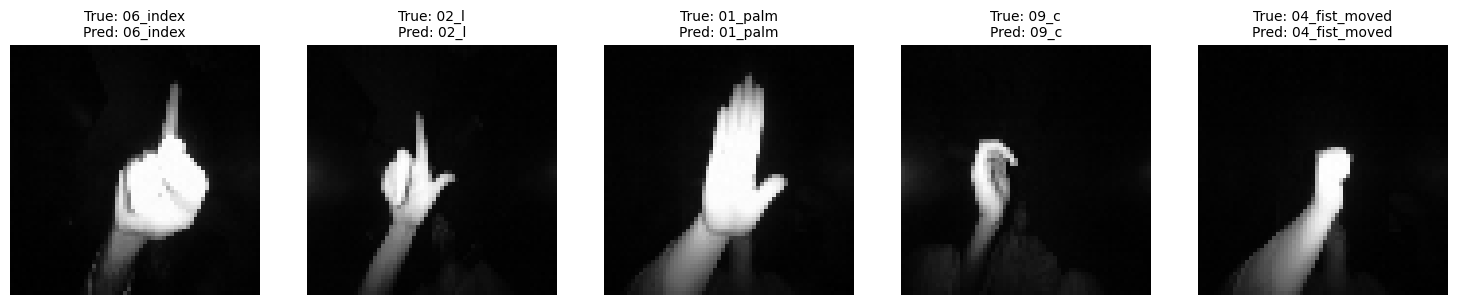

In [ ]:
sample_indices = random.sample(range(len(X_test)), 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns

for ax, i in zip(axes, sample_indices):
    img = X_test[i].reshape(64, 64)  # Adjust to (32, 32) if resized
    true_label = le.inverse_transform([y_test[i]])[0]
    pred_label = le.inverse_transform([clf.predict([X_test[i]])[0]])[0]

    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: {true_label}\nPred: {pred_label}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()